In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.stats import linregress
import scipy.stats as st

In [30]:
# Load in files
rent_index_load = Path("data-files/Zillow_Observed_Rent_Index_(ZORI).csv")
home_value_index_load = Path("data-files/Zillow_Home_Value_Index_(ZHVI).csv")
home_value_forecast_load = Path("data-files/Zillow_Home_Value_Forecast_(ZHVF).csv")
percent_home_sold_above_list_load = Path("data-files/Percent_homes_sold_above_list.csv")
median_sale_to_list_ratio_load = Path("data-files/Median_Sale-to-List_Ratio.csv")
madian_sale_price_load = Path("data-files/Median_Sale_Price.csv")
median_days_to_close_load = Path("data-files/Median_days_to_close.csv")

# Store files as Data Frame
rent_index = pd.read_csv(rent_index_load)
home_value_index = pd.read_csv(home_value_index_load)
home_value_forecast = pd.read_csv(home_value_forecast_load)
percent_home_sold_above_list = pd.read_csv(percent_home_sold_above_list_load)
median_sale_to_list_ratio = pd.read_csv(median_sale_to_list_ratio_load)
madian_sale_price = pd.read_csv(madian_sale_price_load)
median_days_to_close = pd.read_csv(median_days_to_close_load)

In [31]:
# Rent Index Graphics

In [32]:
# Only show the last five years of data
rent_index_labels = rent_index.loc[:, :"StateName"]
rent_index_5_year_sample_data = rent_index.loc[:, '1/31/2019':]
rent_index = pd.concat([rent_index_labels, rent_index_5_year_sample_data], axis=1)
rent_index

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,...,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023
0,102001,0,United States,country,USA,1506.568692,1513.380545,1523.915227,1534.331888,1544.459589,...,1975.835739,1977.938133,1983.983289,1992.489296,2003.280119,2015.846679,2026.886830,2037.184481,2043.719504,2047.095633
1,394913,1,"New York, NY",msa,NY,2658.028349,2668.015671,2683.323173,2701.774818,2722.386695,...,3192.662155,3186.090274,3201.305375,3227.659771,3264.971399,3305.837389,3343.975859,3369.088119,3378.231065,3376.205700
2,753899,2,"Los Angeles, CA",msa,CA,2355.375787,2359.531110,2371.921090,2382.457988,2394.400609,...,2924.394108,2920.801579,2928.269343,2936.661995,2951.164632,2958.004259,2968.798884,2982.964790,2995.886668,3001.423728
3,394463,3,"Chicago, IL",msa,IL,1565.786358,1576.210790,1591.536771,1605.172516,1616.780748,...,1860.947800,1868.049689,1880.888532,1893.637877,1909.273200,1932.058153,1952.481379,1965.321340,1972.630211,1971.321022
4,394514,4,"Dallas, TX",msa,TX,1359.153968,1364.538063,1375.769333,1385.452265,1394.090214,...,1795.720424,1793.799306,1796.900598,1802.831095,1806.282541,1813.190759,1821.711844,1830.681080,1832.988133,1829.204295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,845169,874,"Rockport, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1534.970000,1525.000000
591,394687,875,"Hood River, OR",msa,OR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2180.467751,2239.970719,2254.306482,2132.777778
592,395130,890,"Sterling, CO",msa,CO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,880.000000
593,394718,892,"Jamestown, ND",msa,ND,NaN,NaN,NaN,NaN,NaN,...,787.488592,791.100033,817.419504,839.187519,865.433625,866.851557,865.791510,868.696063,862.929561,882.777778


In [29]:
# Top 25 Regions by Monthly Rent
T25_rent_index_region = rent_index.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
T25_rent_index_region_groupby = T25_rent_index_region.groupby('RegionName').mean()
T25_rent_index_region_groupby_org = T25_rent_index_region_groupby.nlargest(25, "8/31/2023")
T25_rent_index_region_groupby_org_recent = T25_rent_index_region_groupby_org.loc[:, "8/31/2023"]
T25_rent_index_region_groupby_org_recent_August.plot(kind='bar')
plt.title("Top 25 Regions by Monthly Rent (August 2023)")
plt.xlabel("Region")
plt.ylabel("Dollars per Month ($)")
plt.show()

NameError: name 'T25_rent_index_region_groupby_org_recent_August' is not defined

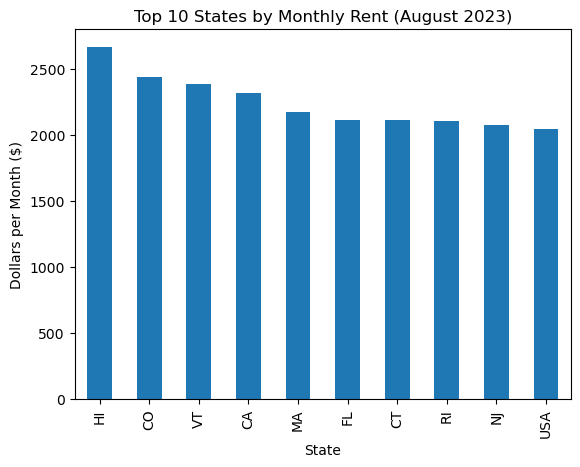

In [28]:
# Top 10 States by Monthly Rent
T10_rent_index_state = rent_index.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
T10_rent_index_state_groupby = T10_rent_index_state.groupby('StateName').mean()
T10_rent_index_state_groupby_org = T10_rent_index_state_groupby.nlargest(10, "8/31/2023")
T10_rent_index_state_groupby_org_recent = T10_rent_index_state_groupby_org.loc[:, "8/31/2023"]
T10_rent_index_state_groupby_org_recent.plot(kind='bar')
plt.title("Top 10 States by Monthly Rent (August 2023)")
plt.xlabel("State")
plt.ylabel("Dollars per Month ($)")
plt.show()

In [ ]:
# Bottom 25 Regions by Monthly Rent
B25_rent_index_region = rent_index.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
B25_rent_index_region_groupby = B25_rent_index_region.groupby('RegionName').mean()
B25_rent_index_region_groupby_org = B25_rent_index_region_groupby.nsmallest(25, "8/31/2023")
B25_rent_index_region_groupby_org_recent = B25_rent_index_region_groupby_org.loc[:, "8/31/2023"]
B25_rent_index_region_groupby_org_recent.plot(kind='bar')
plt.title("Bottom 25 Regions by Monthly Rent (August 2023)")
plt.xlabel("Region")
plt.ylabel("Dollars per Month ($)")
plt.show()

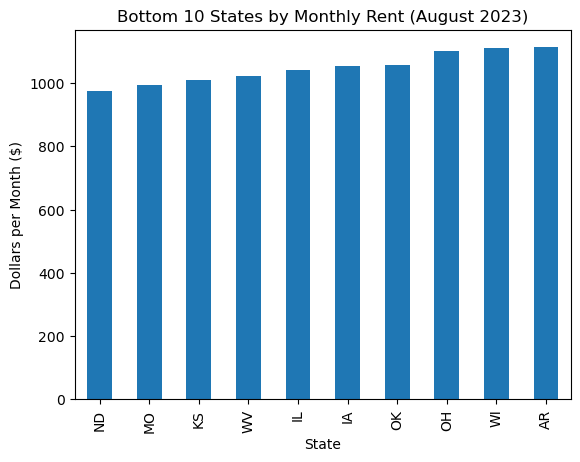

In [22]:
# Bottom 10 States by Monthly Rent
B10_rent_index_state = rent_index.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
B10_rent_index_state_groupby = B10_rent_index_state.groupby('StateName').mean()
B10_rent_index_state_groupby_org = B10_rent_index_state_groupby.nsmallest(10, "8/31/2023")
B10_rent_index_state_groupby_org_recent = B10_rent_index_state_groupby_org.loc[:, "8/31/2023"]
B10_rent_index_state_groupby_org_recent.plot(kind='bar')
plt.title("Bottom 10 States by Monthly Rent (August 2023)")
plt.xlabel("State")
plt.ylabel("Dollars per Month ($)")
plt.show()

In [7]:
# Median Sale Price Graphics

In [8]:
# Only show the last five years of data
madian_sale_price_labels = madian_sale_price.loc[:, :"StateName"]
madian_sale_price_5_year_sample_data = madian_sale_price.loc[:, '1/31/2019':]
madian_sale_price = pd.concat([madian_sale_price_labels, madian_sale_price_5_year_sample_data], axis=1)
madian_sale_price

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,...,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023
0,102001,0,United States,country,USA,230000.0,230000.0,239900.0,245000.0,251000.0,...,325000.0,320000.0,320000.0,329755.0,340000.0,350000.0,360000.0,366000.0,362000.0,360000
1,394913,1,"New York, NY",msa,NY,390000.0,395000.0,389000.0,395000.0,403000.0,...,520000.0,510000.0,520000.0,505000.0,515000.0,539000.0,565000.0,585000.0,600000.0,610000
2,753899,2,"Los Angeles, CA",msa,CA,601000.0,615000.0,630000.0,640000.0,640000.0,...,830000.0,810000.0,815000.0,825000.0,841000.0,850000.0,868000.0,900000.0,895000.0,900000
3,394463,3,"Chicago, IL",msa,IL,217000.0,222000.0,234500.0,240000.0,245000.0,...,275000.0,270000.0,265000.0,272000.0,290000.0,300000.0,310000.0,326050.0,319700.0,320000
4,394514,4,"Dallas, TX",msa,TX,240000.0,249900.0,260000.0,263000.0,275000.0,...,375000.0,360000.0,355000.0,372000.0,374700.0,385000.0,395000.0,405000.0,400000.0,395000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,395206,825,"Washington Court House, OH",msa,OH,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,150000.0,160500.0,139000.0,180000.0,174500.0,195000
574,394864,833,"Mineral Wells, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,230000.0,279000.0,215000.0,280000.0,285000.0,250750.0,242500
575,395159,848,"Toccoa, GA",msa,GA,104000.0,133500.0,105900.0,120750.0,165000.0,...,205500.0,198500.0,228500.0,163125.0,191500.0,200000.0,226000.0,202500.0,213000.0,225000
576,753921,867,"Steamboat Springs, CO",msa,CO,482500.0,459000.0,404000.0,464000.0,485000.0,...,806000.0,1025000.0,774125.0,677500.0,522500.0,841250.0,790000.0,757000.0,897000.0,860000


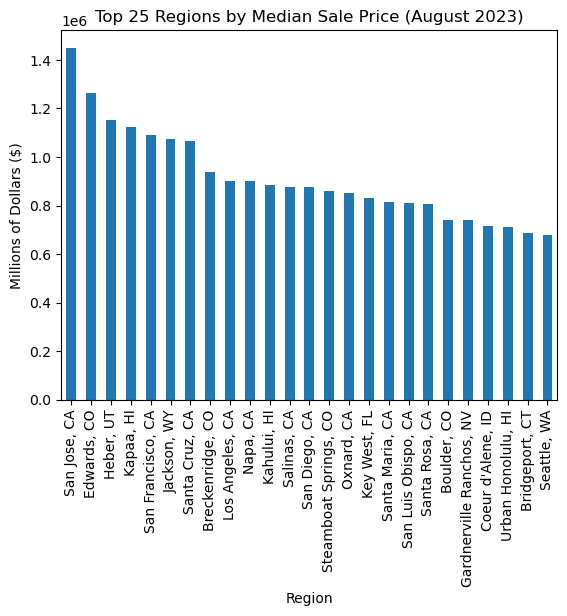

In [9]:
# Top 25 Regions by Median Sale Price
T25_madian_sale_price_region = madian_sale_price.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
T25_madian_sale_price_region_groupby = T25_madian_sale_price_region.groupby('RegionName').mean()
T25_madian_sale_price_region_groupby_org = T25_madian_sale_price_region_groupby.nlargest(25, "8/31/2023")
T25_madian_sale_price_region_groupby_org_recent = T25_madian_sale_price_region_groupby_org.loc[:, "8/31/2023"]
T25_madian_sale_price_region_groupby_org_recent.plot(kind='bar')
plt.title("Top 25 Regions by Median Sale Price (August 2023)")
plt.xlabel("Region")
plt.ylabel("Millions of Dollars ($)")
plt.show()

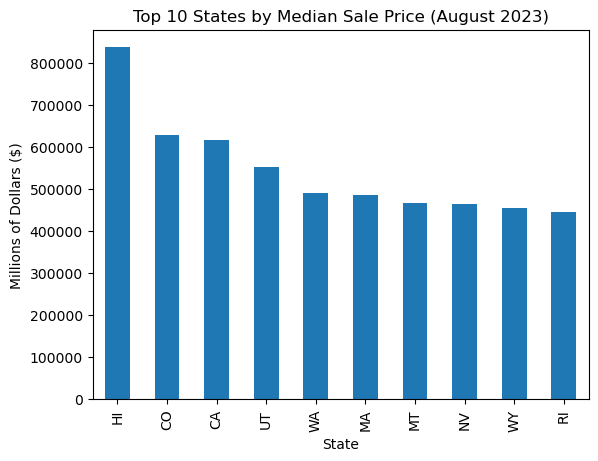

In [10]:
# Top 10 States by Median Sale Price
T10_madian_sale_price_state = madian_sale_price.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
T10_madian_sale_price_state_groupby = T10_madian_sale_price_state.groupby('StateName').mean()
T10_madian_sale_price_state_groupby_org = T10_madian_sale_price_state_groupby.nlargest(10, "8/31/2023")
T10_madian_sale_price_state_groupby_org_recent = T10_madian_sale_price_state_groupby_org.loc[:, "8/31/2023"]
T10_madian_sale_price_state_groupby_org_recent.plot(kind='bar')
plt.title("Top 10 States by Median Sale Price (August 2023)")
plt.xlabel("State")
plt.ylabel("Millions of Dollars ($)")
plt.show()

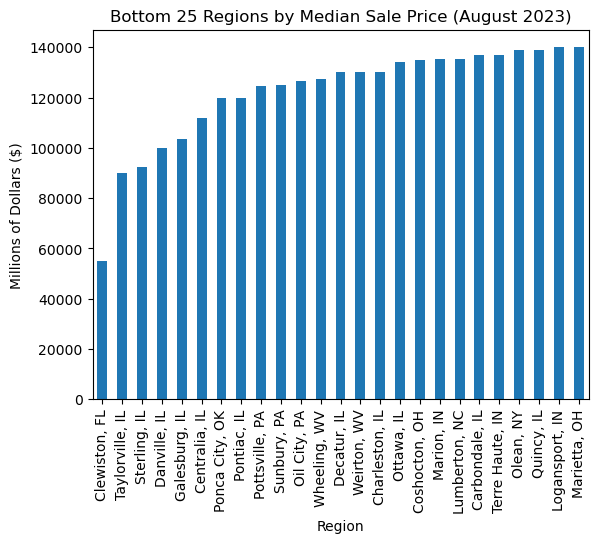

In [11]:
# Bottom 25 Regions by Home Value
B25_madian_sale_price_region = madian_sale_price.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
B25_madian_sale_price_region_groupby = B25_madian_sale_price_region.groupby('RegionName').mean()
B25_madian_sale_price_region_groupby_org = B25_madian_sale_price_region_groupby.nsmallest(25, "8/31/2023")
B25_madian_sale_price_region_groupby_org_recent = B25_madian_sale_price_region_groupby_org.loc[:, "8/31/2023"]
B25_madian_sale_price_region_groupby_org_recent.plot(kind='bar')
plt.title("Bottom 25 Regions by Median Sale Price (August 2023)")
plt.xlabel("Region")
plt.ylabel("Millions of Dollars ($)")
plt.show()

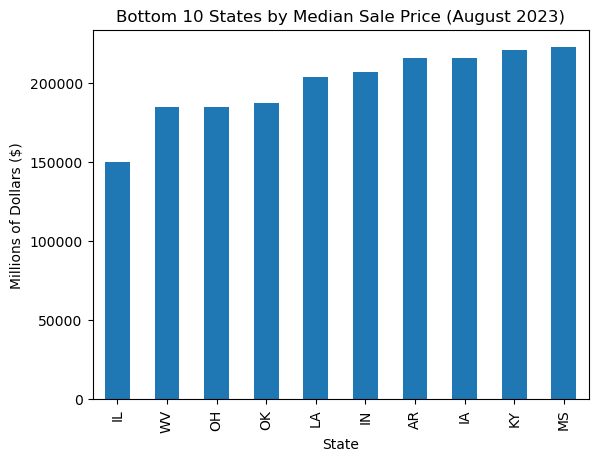

In [12]:
# Bottom 10 States by Home Value
B10_madian_sale_price_state = madian_sale_price.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
B10_madian_sale_price_state_groupby = B10_madian_sale_price_state.groupby('StateName').mean()
B10_madian_sale_price_state_groupby_org = B10_madian_sale_price_state_groupby.nsmallest(10, "8/31/2023")
B10_madian_sale_price_state_groupby_org_recent = B10_madian_sale_price_state_groupby_org.loc[:, "8/31/2023"]
B10_madian_sale_price_state_groupby_org_recent.plot(kind='bar')
plt.title("Bottom 10 States by Median Sale Price (August 2023)")
plt.xlabel("State")
plt.ylabel("Millions of Dollars ($)")
plt.show()

In [13]:
# Correlation to Between Home Value and Rental Price

In [14]:
# Organize Rent Index data
rent_index_region = rent_index.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
rent_index_region_groupby = rent_index_region.groupby('RegionName').mean()
rent_index_region_groupby_recent = rent_index_region_groupby["8/31/2023"]
rent_index_region_groupby_recent_df = pd.DataFrame({'Region': rent_index_region_groupby_recent.index, 'Rent': rent_index_region_groupby_recent.values})
rent_index_region_groupby_recent_df = rent_index_region_groupby_recent_df.groupby('Region').mean()
rent_index_region_groupby_recent_df_RI = rent_index_region_groupby_recent_df.rename(columns={"Rent":"8/31/2023 - RI"})
rent_index_region_groupby_recent_df_RI

,8/31/2023 - RI
Region,
"Aberdeen, WA",1310.091583
"Abilene, TX",1215.852681
"Ada, OK",940.728310
"Adrian, MI",1210.098387
"Akron, OH",1209.298394
...,...
"York, PA",1210.904835
"Youngstown, OH",906.580920
"Yuba City, CA",1778.751068


In [15]:
# Organize Median Sale Price data
madian_sale_price_region = madian_sale_price.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
madian_sale_price_region_groupby = madian_sale_price_region.groupby('RegionName').mean()
madian_sale_price_region_groupby_recent = madian_sale_price_region_groupby.loc[:, "8/31/2023"]
madian_sale_price_region_groupby_recent_df = pd.DataFrame({'Region': madian_sale_price_region_groupby_recent.index, 'Rent': madian_sale_price_region_groupby_recent.values})
madian_sale_price_region_groupby_recent_df = madian_sale_price_region_groupby_recent_df.groupby('Region').mean()
madian_sale_price_region_groupby_recent__df_MSP = madian_sale_price_region_groupby_recent_df.rename(columns={"Rent":"8/31/2023 - MSP"})
madian_sale_price_region_groupby_recent__df_MSP

,8/31/2023 - MSP
Region,
"Abilene, TX",220000.0
"Ada, OK",150000.0
"Adrian, MI",221250.0
"Akron, OH",206091.0
"Albany, NY",320000.0
...,...
"Yakima, WA",375000.0
"York, PA",265000.0
"Youngstown, OH",155000.0


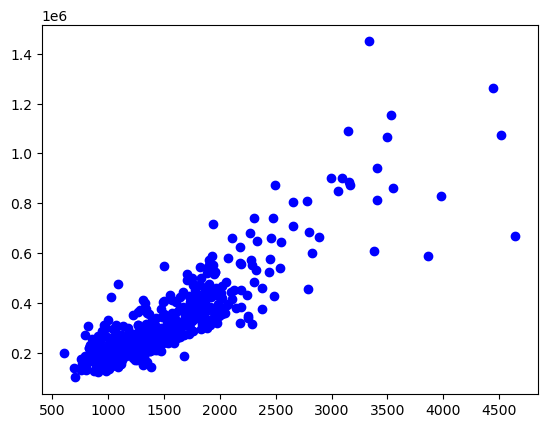

In [16]:
# Plot Scatter
scatter_plot_df = pd.concat([rent_index_region_groupby_recent_df_RI, madian_sale_price_region_groupby_recent__df_MSP], axis=1)
scatter_plot_df_cleaned = scatter_plot_df.dropna()
plt.scatter(scatter_plot_df_cleaned["8/31/2023 - RI"], scatter_plot_df_cleaned["8/31/2023 - MSP"], marker="o", facecolors="blue")

The correlation between the rent price and median sale price is 0.87


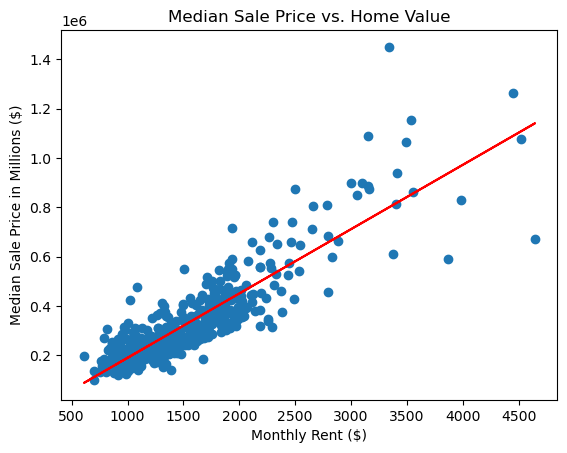

In [17]:
# Linear regression on Northern Hemisphere
x_values = scatter_plot_df_cleaned['8/31/2023 - RI']
y_values = scatter_plot_df_cleaned['8/31/2023 - MSP']

# Calculate the slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Median Sale Price in Millions ($)')
plt.title('Median Sale Price vs. Home Value')

# Calculate and show correlation
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between the rent price and median sale price is {round(correlation[0],2)}")

In [18]:
# Median Days to Close vs. Percent Home Sold Above list

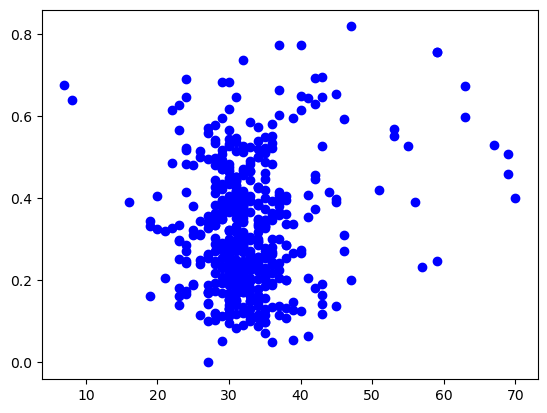

In [19]:
# Only show the last five years of data

# Median Days to Close
median_days_to_close_region = median_days_to_close.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
median_days_to_close_region_groupby = median_days_to_close_region.groupby('RegionName').mean()
median_days_to_close_region_groupby_recent = median_days_to_close_region_groupby.loc[:, "8/31/2023":]
median_days_to_close_region_groupby_recent_MDTC = median_days_to_close_region_groupby_recent.rename(columns={"8/31/2023":"8/31/2023 - MDTC"})
median_days_to_close_region_groupby_recent_MDTC

# Percent Home Sold Above list
percent_home_sold_above_list_region = percent_home_sold_above_list.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
percent_home_sold_above_list_region_groupby = percent_home_sold_above_list_region.groupby('RegionName').mean()
percent_home_sold_above_list_region_groupby_recent = percent_home_sold_above_list_region_groupby.loc[:, "8/31/2023":]
percent_home_sold_above_list_region_groupby_recent_PHSAL = percent_home_sold_above_list_region_groupby_recent.rename(columns={"8/31/2023":"8/31/2023 - PHSAL"})
percent_home_sold_above_list_region_groupby_recent_PHSAL

# Plot Scatter
scatter_plot_df_2 = pd.concat([median_days_to_close_region_groupby_recent_MDTC, percent_home_sold_above_list_region_groupby_recent_PHSAL], axis=1)
scatter_plot_df_2_cleaned = scatter_plot_df_2.dropna()
plt.scatter(scatter_plot_df_2_cleaned["8/31/2023 - MDTC"], scatter_plot_df_2_cleaned["8/31/2023 - PHSAL"], marker="o", facecolors="blue")

Text(0.5, 1.0, 'Scatter Plot of Median Days to Close vs. Percent Homes Sold Above List for All Regions')

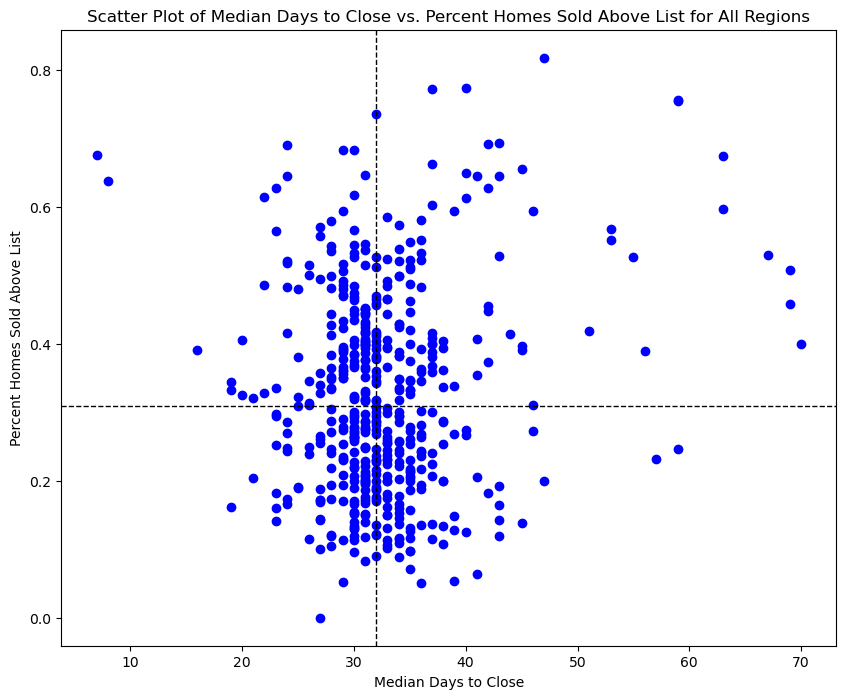

In [20]:
plt.figure(figsize=(10, 8))

# Divide the plot into four quadrants
plt.axvline(x=scatter_plot_df_2_cleaned['8/31/2023 - MDTC'].median(), color='black', linestyle='--', linewidth=1, label='Median Days to Close')
plt.axhline(y=scatter_plot_df_2_cleaned['8/31/2023 - PHSAL'].median(), color='black', linestyle='--', linewidth=1, label='Percent Homes Sold Above List')

# Plot the data points
scatter = plt.scatter(scatter_plot_df_2_cleaned["8/31/2023 - MDTC"], scatter_plot_df_2_cleaned["8/31/2023 - PHSAL"], marker="o", facecolors="blue")

# Add labels for each data point (state abbreviation)
#for i, txt in enumerate(selected_states_data_sorted['StateName']):
    #plt.text(selected_states_data_sorted['Avg_Days_To_Close'].iloc[i], selected_states_data_sorted['Percent_Home_Sold_Above_List'].iloc[i], txt, ha='right', va='bottom')
plt.xlabel('Median Days to Close')
plt.ylabel('Percent Homes Sold Above List')
plt.title('Scatter Plot of Median Days to Close vs. Percent Homes Sold Above List for All Regions')

In [53]:
# Median Sale Price By State (August 2023)
B10_madian_sale_price_state = madian_sale_price.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
B10_madian_sale_price_state_groupby = B10_madian_sale_price_state.groupby('StateName').mean()
B10_madian_sale_price_state_groupby_org = B10_madian_sale_price_state_groupby.nsmallest(51, "8/31/2023")
B10_madian_sale_price_state_groupby_org_recent = B10_madian_sale_price_state_groupby_org.loc[:, "8/31/2023"]
B10_madian_sale_price_state_groupby_org_recent_df = B10_madian_sale_price_state_groupby_org_recent.reset_index()
B10_madian_sale_price_state_groupby_org_recent_df.columns = ['StateName', '8/31/2023']
print(B10_madian_sale_price_state_groupby_org_recent_df)

   StateName      8/31/2023
0         IL  150316.666667
1         WV  185000.000000
2         OH  185026.138889
3         OK  187145.833333
4         LA  203893.750000
5         IN  206998.217391
6         AR  215750.000000
7         IA  215750.000000
8         KY  221004.166667
9         MS  222500.000000
10        AL  223070.833333
11        MO  223338.235294
12        PA  226993.782609
13        NM  232583.333333
14        MI  233446.608696
15        NE  249794.400000
16        WI  254738.095238
17        ND  263816.666667
18        KS  277000.000000
19        MN  277266.666667
20        TX  279527.096774
21        GA  280518.181818
22        TN  283502.500000
23        NY  287397.368421
24        SC  299808.333333
25        NC  308535.937500
26        MD  320625.000000
27        ME  333750.000000
28        VA  350655.555556
29        FL  352809.615385
30        SD  356225.000000
31       USA  360000.000000
32        DE  363000.000000
33        NJ  372889.250000
34        AK  375000

In [54]:
import plotly.graph_objects as go

import pandas as pd
df = B10_madian_sale_price_state_groupby_org_recent_df

fig = go.Figure(data=go.Choropleth(
    locations=df['StateName'], # Spatial coordinates
    z = df['8/31/2023'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "USD",
))

fig.update_layout(
    title_text = 'Median Sale Price (August 2023)',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [50]:
# Average Monthly Rent Price By State (August 2023)
T10_rent_index_state = rent_index.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
T10_rent_index_state_groupby = T10_rent_index_state.groupby('StateName').mean()
T10_rent_index_state_groupby_org = T10_rent_index_state_groupby.nlargest(51, "8/31/2023")
T10_rent_index_state_groupby_org_recent = T10_rent_index_state_groupby_org.loc[:, "8/31/2023"]
T10_rent_index_state_groupby_org_recent_df = T10_rent_index_state_groupby_org_recent.reset_index()
T10_rent_index_state_groupby_org_recent_df.columns = ['StateName', '8/31/2023']
print(T10_rent_index_state_groupby_org_recent_df)

   StateName    8/31/2023
0         HI  2664.777366
1         CO  2437.720466
2         VT  2387.523740
3         CA  2312.848909
4         MA  2176.228070
5         FL  2110.072828
6         CT  2108.875747
7         RI  2103.774459
8         NJ  2072.185293
9        USA  2043.719504
10        UT  1922.956782
11        NH  1851.799063
12        OR  1789.022402
13        WA  1761.825689
14        AK  1757.414356
15        AZ  1754.219751
16        NV  1751.553811
17        DE  1746.298246
18        ID  1665.927926
19        WY  1651.075351
20        ME  1648.806363
21        MT  1614.653266
22        NY  1607.039478
23        SC  1605.935854
24        VA  1559.878500
25        NC  1511.032757
26        GA  1492.395820
27        MD  1482.822266
28        TX  1420.733917
29        TN  1413.996735
30        NM  1354.700798
31        AL  1350.040781
32        MS  1328.085428
33        MI  1310.865746
34        PA  1229.778422
35        LA  1189.953412
36        SD  1173.307957
37        KY

In [52]:
import plotly.graph_objects as go

import pandas as pd
df = T10_rent_index_state_groupby_org_recent_df

fig = go.Figure(data=go.Choropleth(
    locations=df['StateName'], # Spatial coordinates
    z = df['8/31/2023'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "USD",
))

fig.update_layout(
    title_text = 'Average Monthly Rent Price (August 2023)',
    geo_scope='usa', # limite map scope to USA
)

fig.show()